IRIS FLOWER CLASSIFICATION

IMPORTING THE NEEDED ITEMS

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

importing data from csv file

In [5]:
my_data=pd.read_csv("/content/IRIS[1].csv")

In [ ]:
my_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


checking the shape of data set

In [8]:
my_data.shape

(150, 5)

basic info of dataset

In [9]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
my_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

checking the null values

In [12]:
my_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

describing the data

In [ ]:
my_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
x=my_data.drop(columns='species',axis=1)
y=my_data['species']
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

Correlation

In [20]:
my_data.corr()

<ipython-input-20-f095e0d354fe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_data.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Analysis

In [ ]:
my_data["sepal_length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

<Axes: >

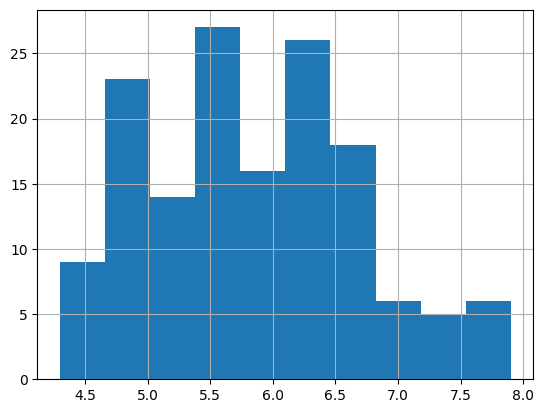

In [ ]:
my_data["sepal_length"].hist()

In [ ]:
my_data["sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

<Axes: >

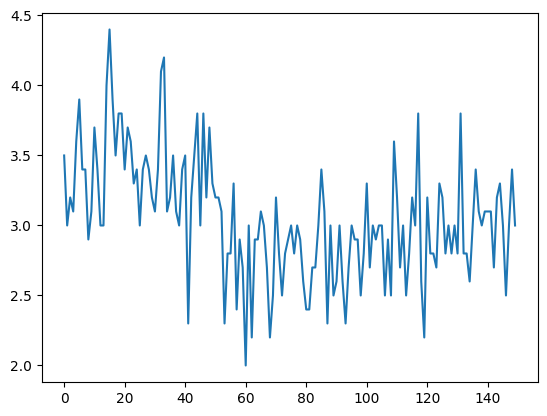

In [ ]:
my_data["sepal_width"].plot()

In [ ]:
my_data["petal_width"]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

<Axes: >

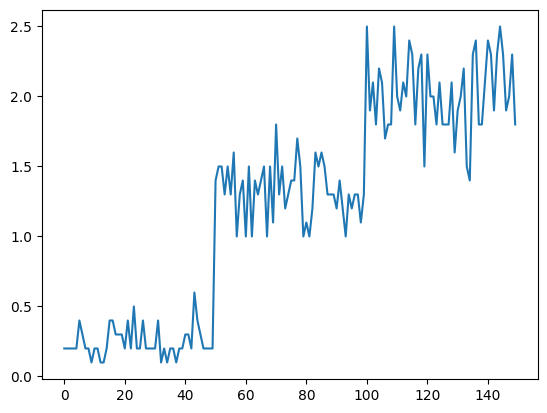

In [ ]:
my_data["petal_width"].plot()

In [ ]:
sns.set()

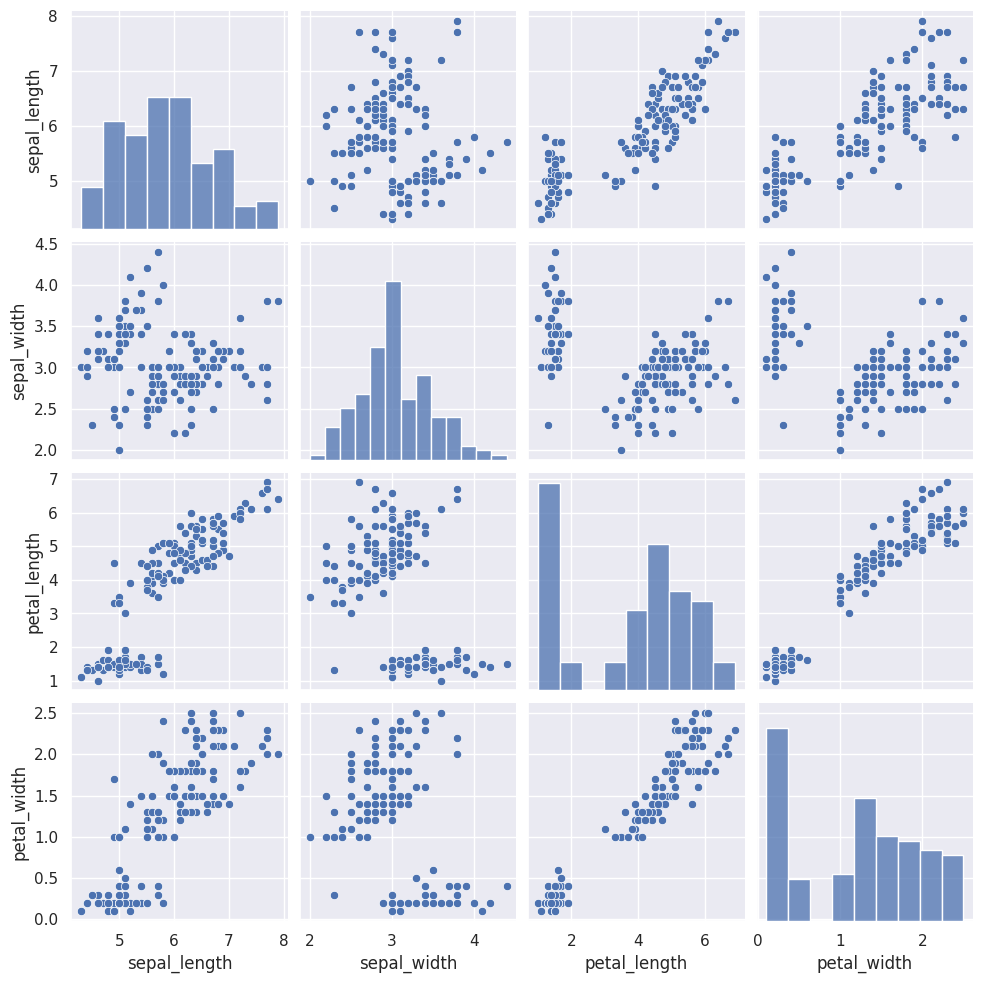

In [ ]:
sns.pairplot(my_data)

TRAINING AND TESTING THE MODEL

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify =y,random_state=2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(150, 4) (120, 4) (30, 4)


In [31]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train

array([[ 0.33661809, -0.32913365,  0.54679015,  0.26968039],
       [ 0.58367723, -0.79379292,  0.66150138,  0.79375563],
       [ 0.58367723,  0.60018489,  1.29241309,  1.71088731],
       [ 0.08955894, -0.09680401,  0.7762126 ,  0.79375563],
       [-1.14573679,  0.13552562, -1.28858938, -1.43356416],
       [ 0.08955894, -0.09680401,  0.2600121 ,  0.4006992 ],
       [-0.28102978, -0.09680401,  0.43207893,  0.4006992 ],
       [ 1.07779553, -1.25845219,  1.17770187,  0.79375563],
       [ 0.21308851, -0.32913365,  0.43207893,  0.4006992 ],
       [-0.40455935, -1.25845219,  0.14530088,  0.13866158],
       [ 0.58367723, -1.25845219,  0.71885699,  0.92477444],
       [ 0.21308851, -1.9554411 ,  0.14530088, -0.25439486],
       [ 0.58367723, -1.72311147,  0.37472332,  0.13866158],
       [-0.40455935, -1.72311147,  0.14530088,  0.13866158],
       [ 0.70720681, -0.56146329,  1.06299065,  1.31783088],
       [-0.40455935, -1.49078183, -0.02676595, -0.25439486],
       [ 0.58367723, -0.

In [32]:
x_test=scaler.fit_transform(x_test)
x_test

array([[-1.25362483, -0.2372781 , -1.32483532, -1.22270536],
       [ 1.12524157,  0.22196983,  1.04225272,  1.44501543],
       [ 0.3322861 , -0.69652603,  0.54681569,  0.77808523],
       [-1.70674224, -0.46690207, -1.32483532, -1.3560914 ],
       [ 0.78540351, -0.46690207,  0.43671857,  0.11115503],
       [ 2.03147639, -0.69652603,  1.59273831,  1.04485731],
       [ 0.44556545,  0.68121777,  0.98720416,  1.57840147],
       [-0.23411066, -1.38539793,  0.6569128 ,  1.04485731],
       [-0.23411066,  1.59971364, -1.15968964, -1.22270536],
       [-1.48018354,  1.1404657 , -1.54502955, -1.3560914 ],
       [-0.23411066, -0.69652603,  0.16147577,  0.11115503],
       [-0.12083131, -0.92615   ,  0.05137866, -0.02223101],
       [-0.80050742, -0.92615   ,  0.05137866,  0.24454107],
       [ 0.55884481, -0.00765413,  0.9321556 ,  0.77808523],
       [-1.02706613,  0.68121777, -1.26978676, -1.3560914 ],
       [ 2.03147639,  1.59971364,  1.59273831,  1.31162939],
       [-0.23411066, -0.

TESTING WITH SVM

In [33]:
from sklearn import svm
svm=svm.SVC()
svm.fit(x_train,y_train)

SVC()

In [34]:
pred2=svm.predict(x_test)
accuracy_score(pred2,y_test)

1.0

Testing Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
RF=model.predict(x_test)
accuracy_score(RF,y_test)

1.0

Testing with logistic regression

In [37]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [38]:
pred1=model.predict(x_test)
accuracy_score(y_test,pred1)

1.0